# Математика для Data Science.
# Домашнее задание №1.

Загрузим датасет о ценах на дома в Бостоне. 

In [34]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

boston = load_boston()
print(boston.data.shape)

(506, 13)


In [32]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Каждый дом - это вектор в 13-мерном пространстве. 
Написать код для подсчета скалярного произведения двух первых домов из датасета.

In [4]:
x1 = boston.data[0] # дом 1
x2 = boston.data[1] # дом 2

In [41]:
np.dot(x1,x2)

234704.86490859918

In [6]:
def dotproduct(a,b):
    return sum([a[i]*b[i] for i in range(len(a))])

In [7]:
dotproduct(x1,x2)

234704.86490859918

этап 2: взять два атрибута и посчитать скалярное произведение двух векторов (2 дома), начертить 2 дома как вектора в двухмерном пространстве, и сравниваем графически и через скалярное произведение.


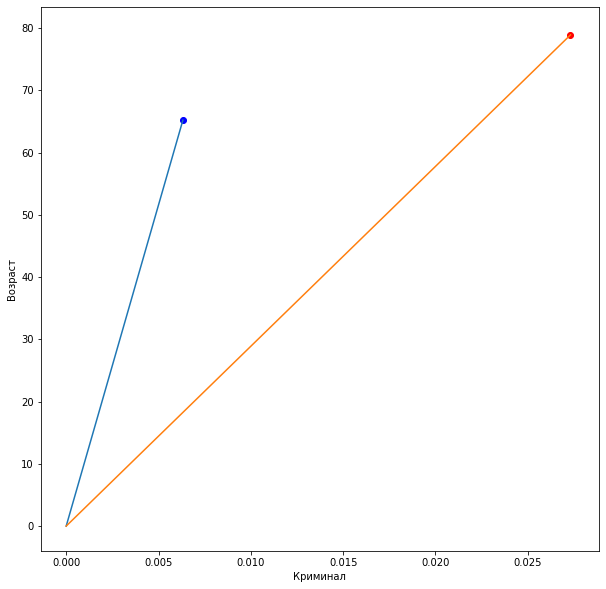

In [43]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()

x = np.array(df['CRIM'])
y = np.array(df['AGE'])

ax.plot([0,x[0]], [0,y[0]])
ax.plot([0,x[1]], [0,y[1]])

ax.scatter(x[0], y[0], c='b', marker='o')
ax.scatter(x[1], y[1], c='r', marker='o')

ax.set_xlabel('Криминал')
ax.set_ylabel('Возраст')

plt.show()

In [96]:
x1 = x[:2]
print(x1)

[296. 242.]


In [97]:
x2 = y[:2]
print(x2)

[0.00632 0.02731]


Нарисовать два дома в 3-мерном пространстве (атрибуты выбрать самостоятельно)

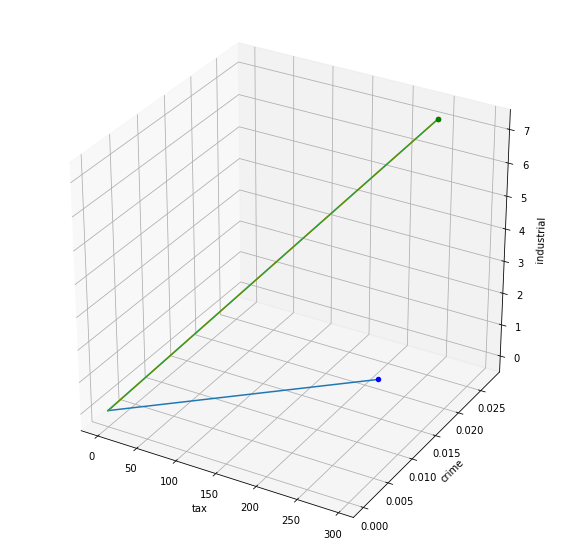

In [47]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

x = np.array(df['TAX'])
y = np.array(df['CRIM'])
z = np.array(df['INDUS'])

ax.plot([0,x[0]], [0,y[0]], [0,z[0]])
ax.plot([0,x[1]], [0,y[1]], [0,z[1]])
ax.plot([0,x[2]], [0,y[2]], [0,z[2]])

ax.scatter(x[0], y[0], z[0], c='b', marker='o')
ax.scatter(x[1], y[1], z[1], c='r', marker='o')
ax.scatter(x[2], y[2], z[2], c='g', marker='o')

ax.set_xlabel('tax')
ax.set_ylabel('crime')
ax.set_zlabel('industrial')

plt.show()

Найти косинус угла между векторами x1 и x2, где x1 и x2 - это два дома из 2ух атрибутов, полученных на этапе 2.

In [80]:
x1 = x[:2]
x2 = y[:2]

In [81]:
from math import acos

In [85]:
def angle(v1, v2, acute):
# v1 is your firsr vector
# v2 is your second vector
    angle = np.arccos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
    if (acute == True):
        return angle
    else:
        return 2 * np.pi - angle

In [98]:
angle(x1,x2, 'True')

5.625164275989924

Найти расстояние между точками x1 и x2.

In [99]:
angle(x1,x2, 'False')

5.625164275989924

# Задание повышенного уровня.

Задан объект в пространстве 2D. 
Изменить положение объекта (сместить по оси x на 300 пикселей, по оси y на 200 пикселей).

(-200, 200)

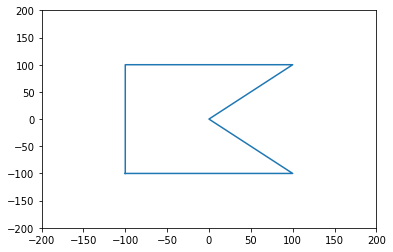

In [127]:
import numpy as np
import matplotlib.pyplot as plt

A = [
    [-100, -100, 1],
    [-100, 100, 1],
    [100, 100, 1],
    [0, 0, 1],
    [100, -100, 1],
    [-100, -100, 1]
    ]
A = np.array(A)
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

Уменьшить объект в два раза.

In [128]:
for u in range(len(A)):
    for i in range(len(A[u])):
        A[u][i] = A[u][i] / 2
        
A

array([[-50, -50,   0],
       [-50,  50,   0],
       [ 50,  50,   0],
       [  0,   0,   0],
       [ 50, -50,   0],
       [-50, -50,   0]])

In [150]:
A = A / 2

(-200, 200)

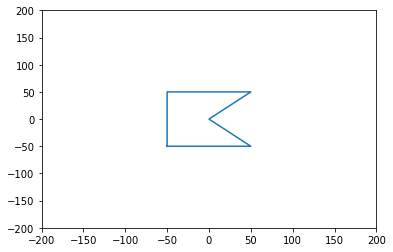

In [151]:
A = np.array(A)
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

Повернуть на 130 градусов.

In [133]:
from math import cos, sin, pi

theta = 130 * 180/pi
TransformArray = np.array([
    [cos(theta), sin(theta), 0],
    [-sin(theta), cos(theta), 0],
    [0, 0, 1]
])

In [153]:
B = []
for point in A:
    
    new_point=np.dot(TransformArray,np.transpose(point))
    B.append(new_point)
    
    
    
B = np.array(B).astype(int)
print(B)

[[ 35  61   0]
 [ 61 -35   0]
 [-35 -61   0]
 [  0   0   0]
 [-61  35   0]
 [ 35  61   0]]


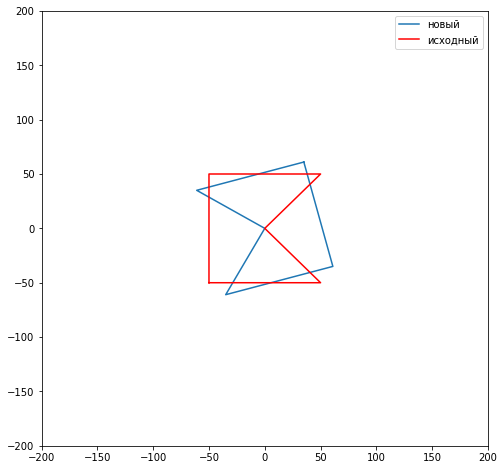

In [154]:
plt.figure(
    figsize=(8, 8),
    )
x = B[:,0]
y = B[:,1]
plt.plot(x, y)
x = A[:,0]
y = A[:,1]
plt.plot(x, y, color='r')
plt.ylim([-200, 200])
plt.xlim([-200, 200])
plt.legend(['новый', 'исходный'])

Отразить объект относительно прямой y=x

Выполнить смещение объекта и масштабирование (применить 2 матрицы трансформаций). Смещение на (200, 300) и масштабирование на (0.5, 1,2)

In [157]:
TransformArray = np.array([
    [1, 0, 200],
    [0, 1, -300],
    [0, 0, 1]
])

In [162]:
B = []
for point in A:
    new_point=np.dot(TransformArray,np.transpose(point))
    B.append(new_point)
print(B)

[array([-50., -50.,   0.]), array([-50.,  50.,   0.]), array([50., 50.,  0.]), array([0., 0., 0.]), array([ 50., -50.,   0.]), array([-50., -50.,   0.])]


(-200, 200)

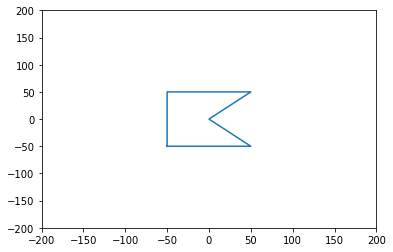

In [172]:
B = np.array(B)

x = B[:,0]
y = B[:,1]

plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])